In [134]:
from pyexpat import features

import pandas as pd
import numpy as np
from nbformat.sign import algorithms


# load data

In [135]:
# load data
data = pd.read_csv('data.csv')


In [136]:
# checking shape of the data
print(data.shape)

(569, 33)


In [137]:
# extract column names
print(data.columns)
# no of columns
print(len(data.columns))

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
33


# Initial Data Inspection

In [138]:
# printing first few rows of the data
print(data.head())

# drop Unnamed: 32 column
data = data.drop(columns=['Unnamed: 32'])
# drop id column
data = data.drop(columns=['id'])


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [139]:
# info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Summary Statistics

In [140]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [141]:
# diagonis - M = malignant, B = benign
data.diagnosis.value_counts()

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
# label encoding for diagnosis column
data['diagnosis_label'] = data['diagnosis'].map({'M':1, 'B':0})

# drop diagnosis column
data = data.drop(columns=['diagnosis'])


# Visualizing the Distribution of the Target Variable

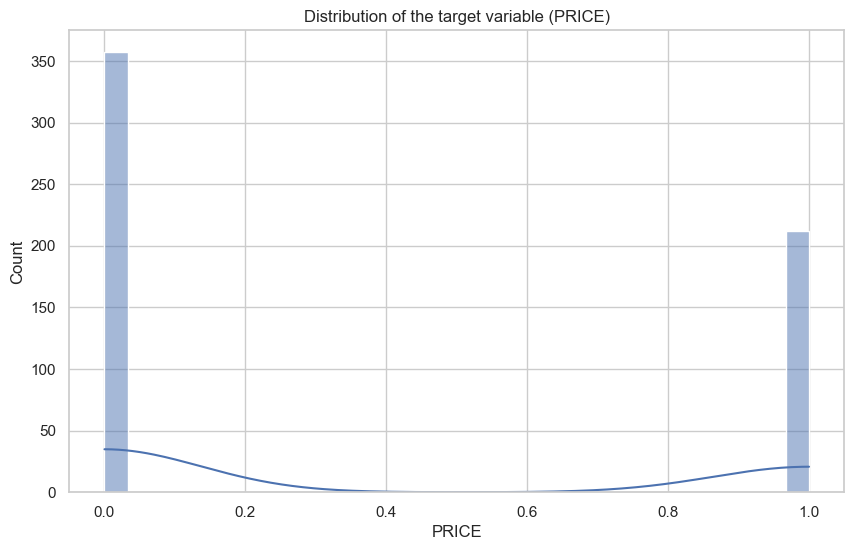

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data["diagnosis_label"], bins=30, color="b", kde=True)
plt.title("Distribution of the target variable (PRICE)")
plt.xlabel("PRICE")
plt.ylabel("Count")
plt.show()

# Analyzing relationships between features and target variable
1 correlation between features and target variable

Highly correlated features:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
radius_mean,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.9,NaN,NaN,...,NaN,1.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,1.0,0.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,0.9,1.0,0.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN
concave points_mean,NaN,NaN,0.9,NaN,NaN,NaN,0.9,1.0,NaN,NaN,...,NaN,0.9,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Least correlated features:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
radius_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
texture_mean,NaN,NaN,NaN,NaN,-0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
smoothness_mean,NaN,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0


diagnosis_label            1.0
concave points_mean        0.8
concave points_worst       0.8
perimeter_worst            0.8
radius_worst               0.8
concavity_worst            0.7
area_worst                 0.7
radius_mean                0.7
perimeter_mean             0.7
area_mean                  0.7
concavity_mean             0.7
radius_se                  0.6
perimeter_se               0.6
compactness_worst          0.6
compactness_mean           0.6
area_se                    0.5
texture_worst              0.5
smoothness_worst           0.4
symmetry_worst             0.4
texture_mean               0.4
concave points_se          0.4
smoothness_mean            0.4
symmetry_mean              0.3
fractal_dimension_worst    0.3
compactness_se             0.3
concavity_se               0.3
fractal_dimension_se       0.1
fractal_dimension_mean    -0.0
symmetry_se               -0.0
texture_se                -0.0
smoothness_se             -0.1
Name: diagnosis_label, dtype: float64


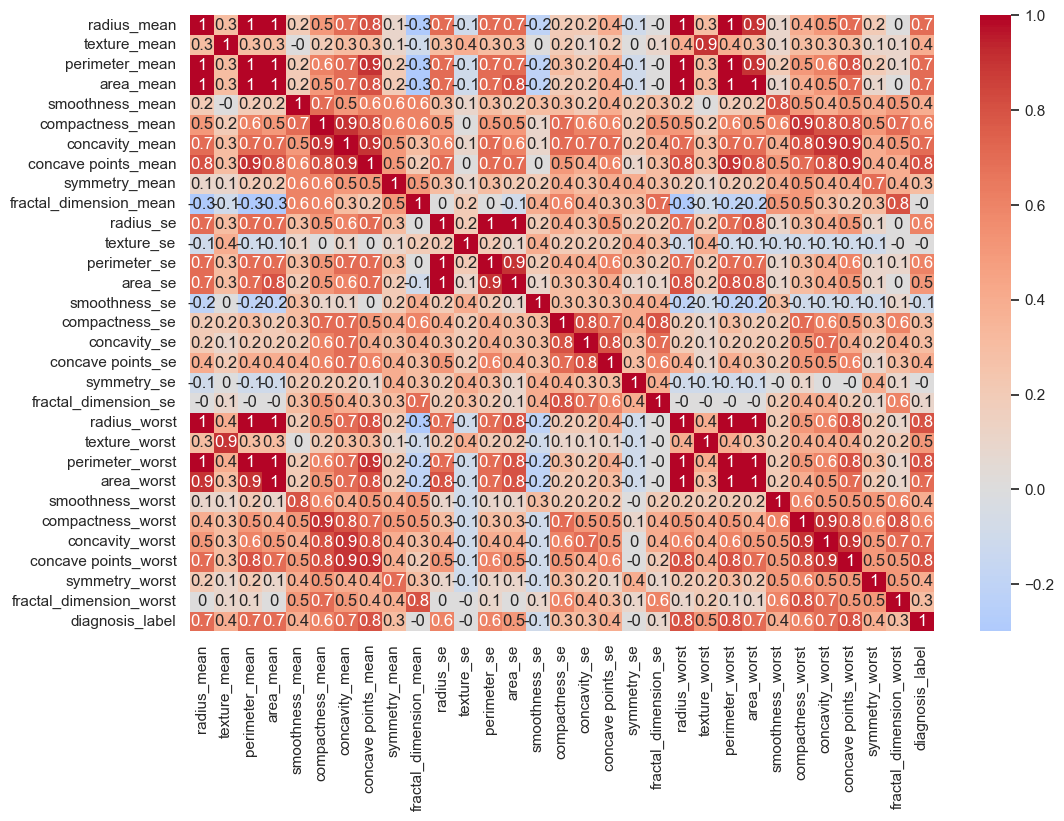

In [144]:
df = data

corr = df.corr().round(1)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)


# print highly correlated features
print("Highly correlated features:")
high_corr = corr[abs(corr) > 0.8]
display(high_corr)

# Least correlated features
print("Least correlated features:")
least_corr = corr[abs(corr) < 0.1]
display(least_corr)

high_correlated_with_target = corr["diagnosis_label"].sort_values(ascending=False)
print(high_correlated_with_target)

radius, perimeter, area are highly correlated, we can drop two of these
radius_mean, perimeter_mean, area_mean are highly correlated, we can drop two of these
radius_worst, perimeter_worst, area_worst are highly correlated, we can drop two of these.
fractal_dimension_mean, texture_se, symmetry_se are least correlated, which we can drop 

In [145]:
# radius, perimeter, area are highly correlated, we can drop two of these
# radius_mean, perimeter_mean, area_mean are highly correlated, we can drop two of these
# radius_worst, perimeter_worst, area_worst are highly correlated, we can drop two of these.
# fractal_dimension_mean, texture_se, symmetry_se are least correlated, which we can drop 
data_original = data.copy()
data = data_original.drop(columns=["radius_mean", "perimeter_mean", "area_mean", "radius_worst", "perimeter_worst", "area_worst", "fractal_dimension_mean", "texture_se", "symmetry_se"])



# plots 

<Figure size 1600x1200 with 0 Axes>

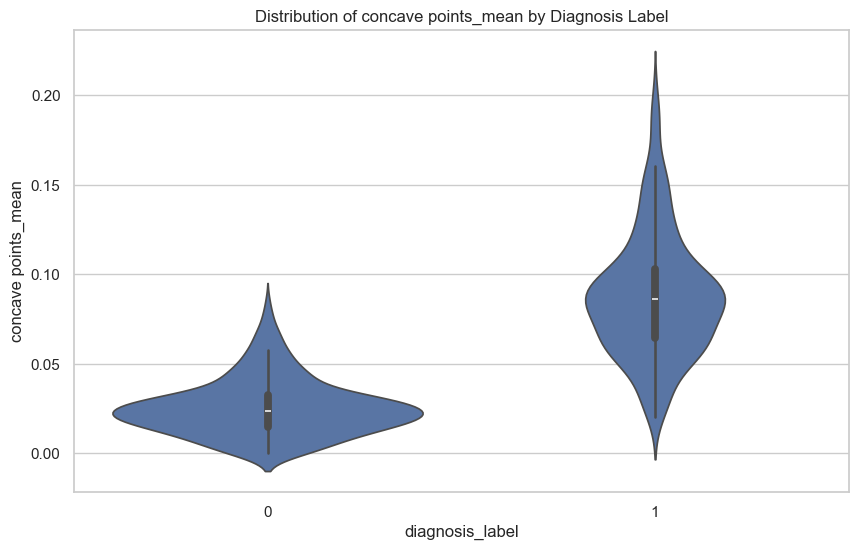

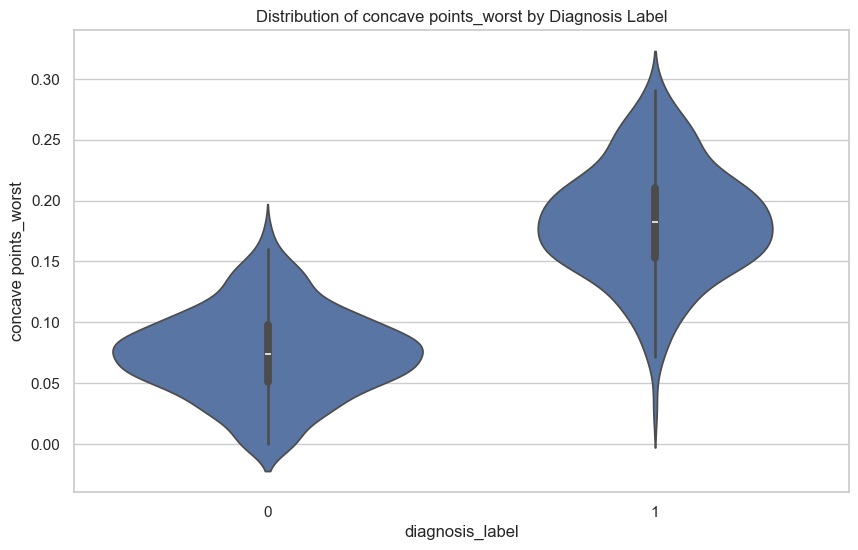

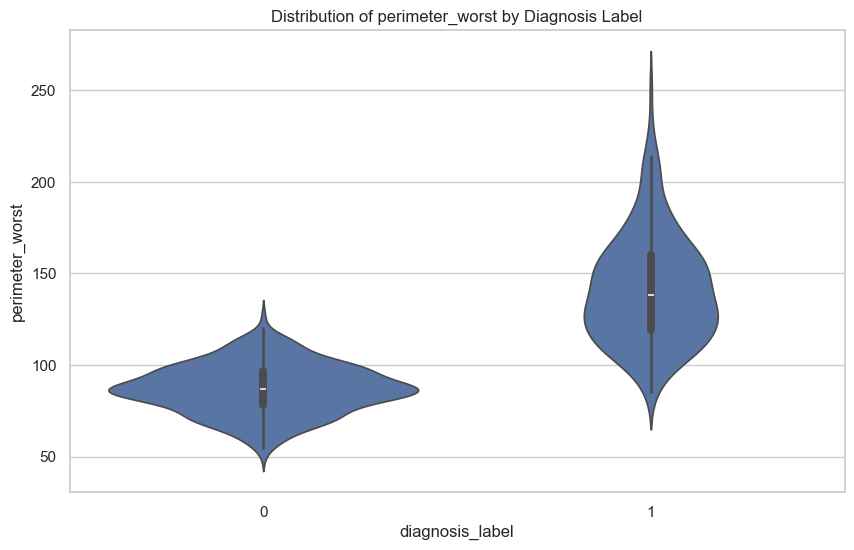

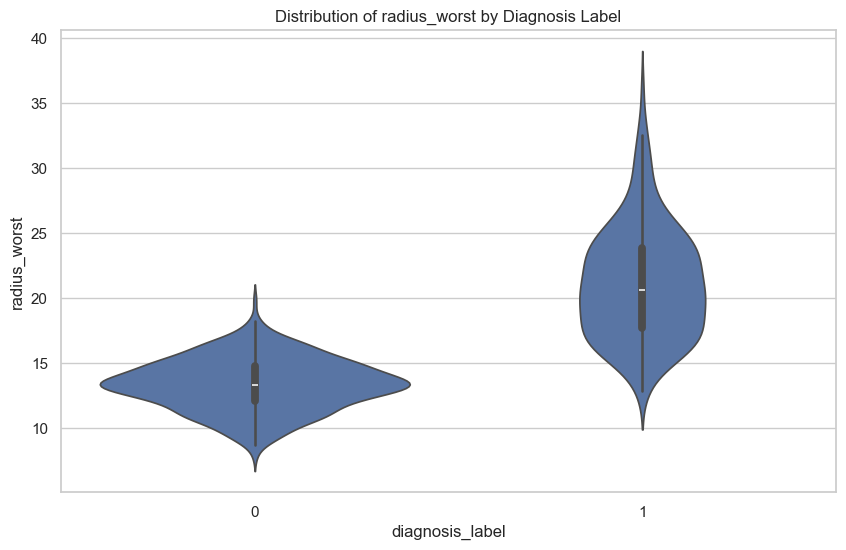

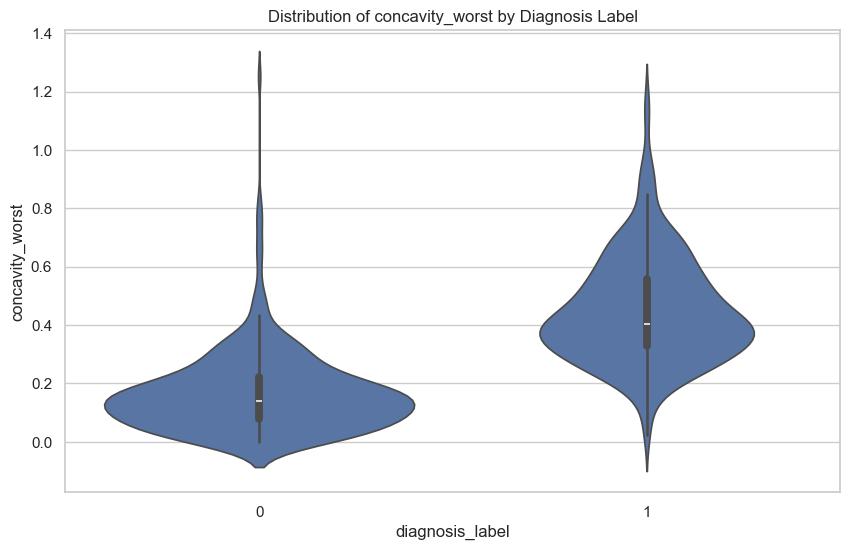

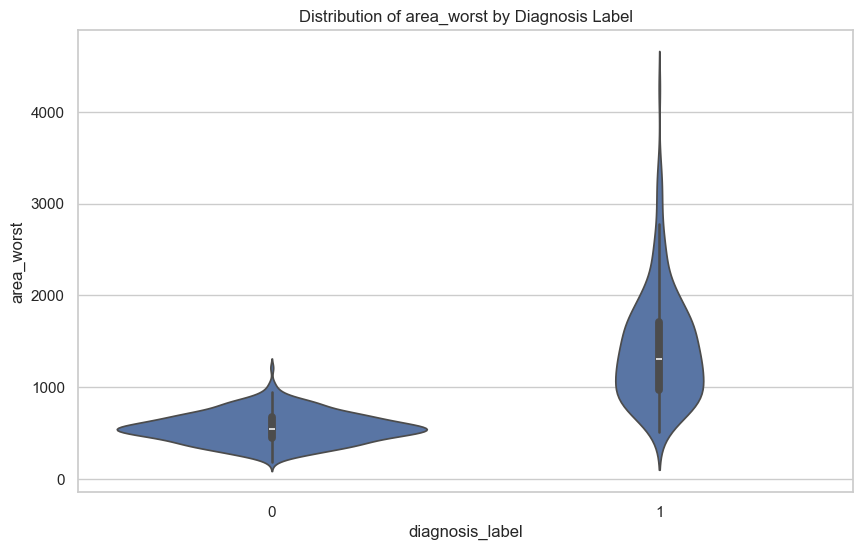

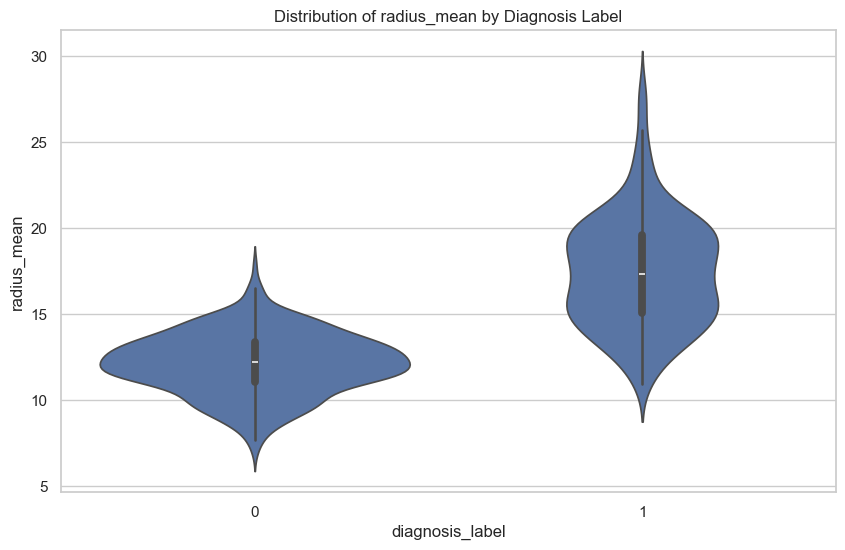

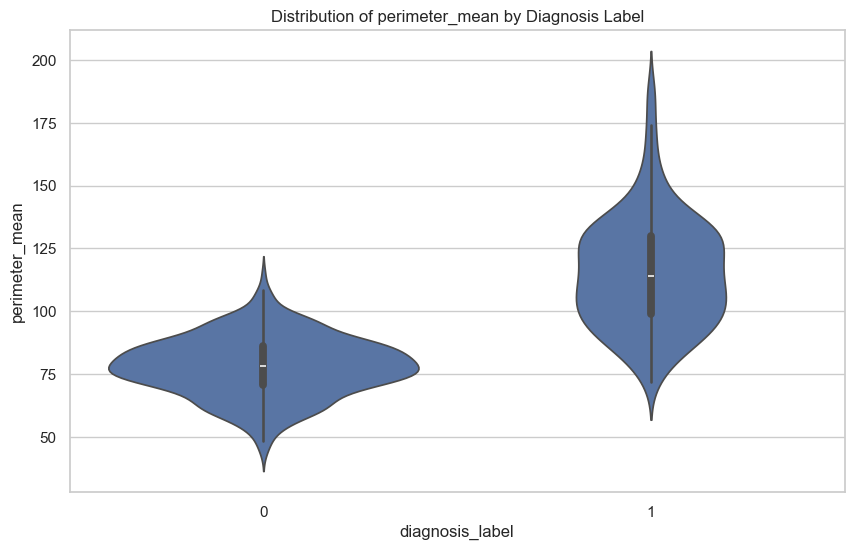

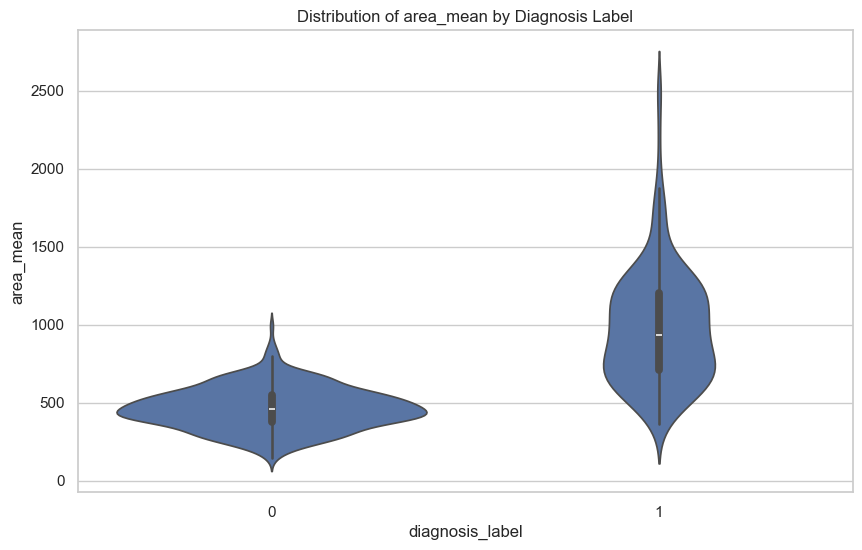

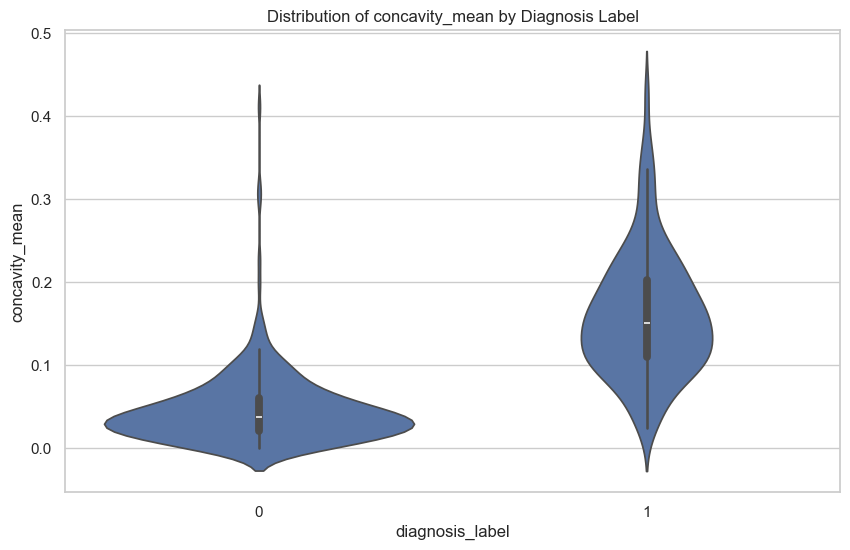

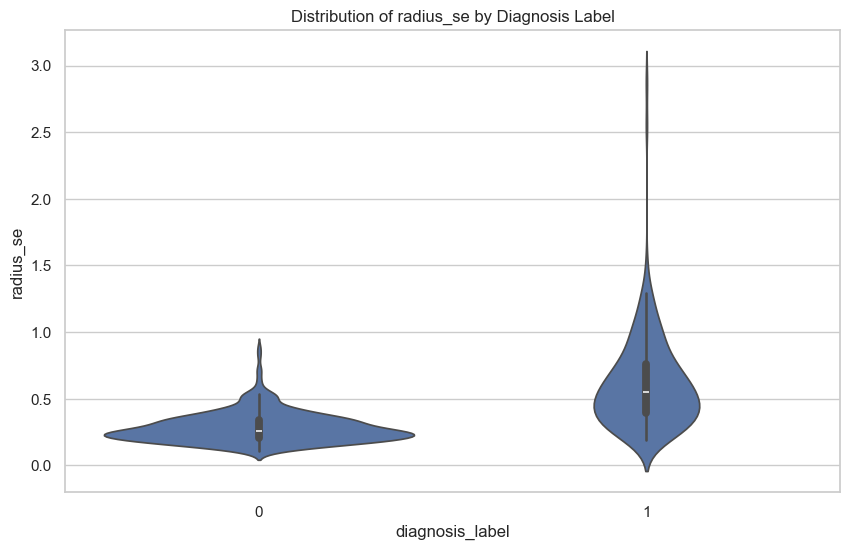

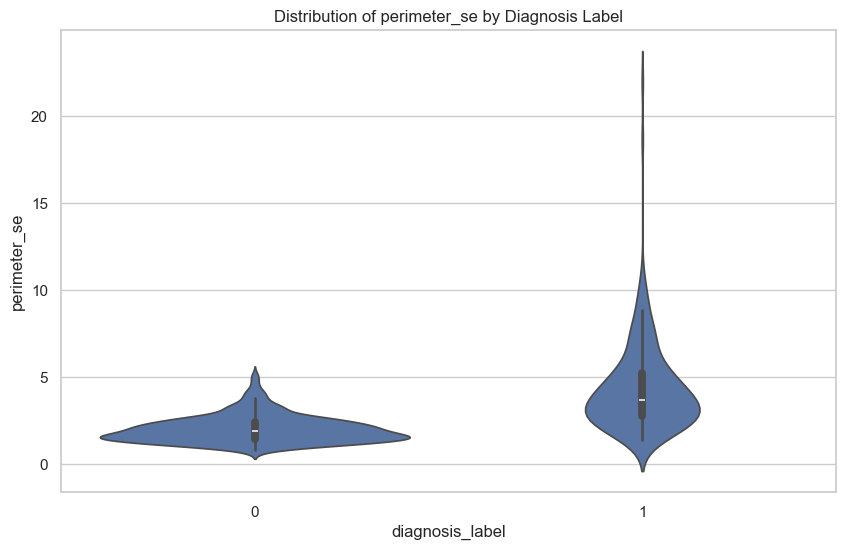

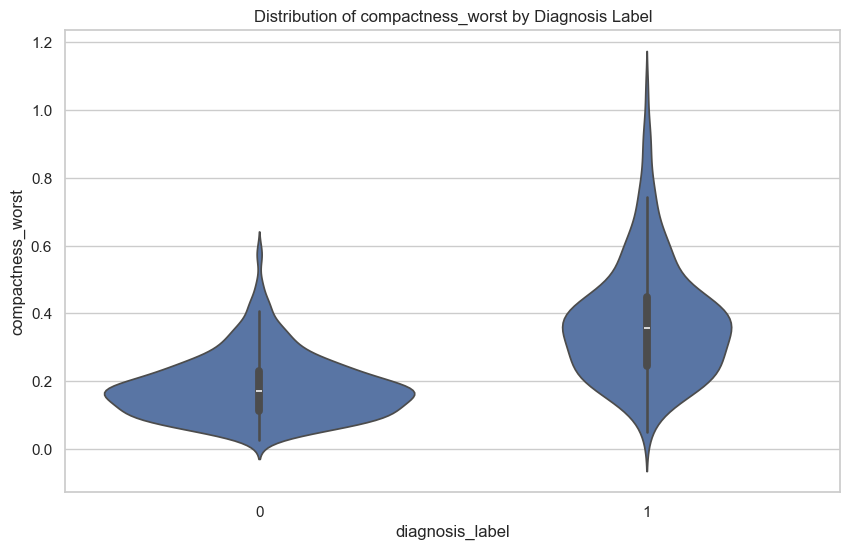

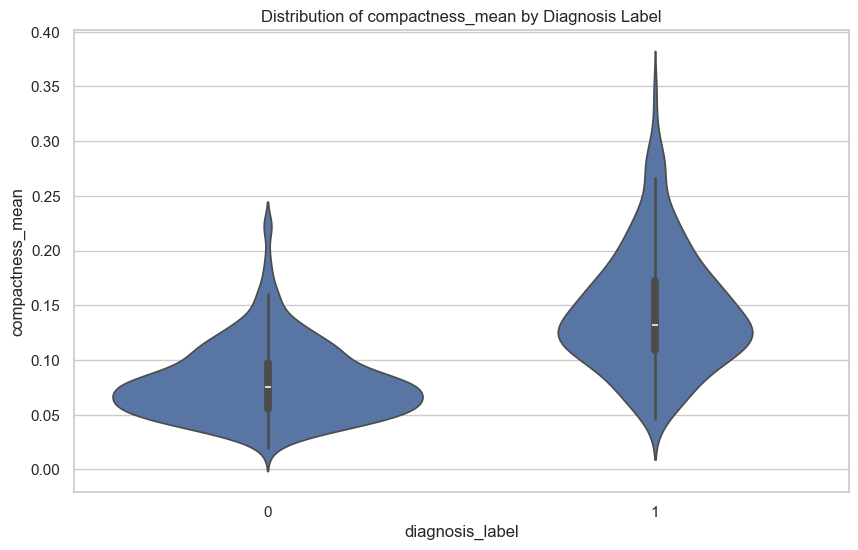

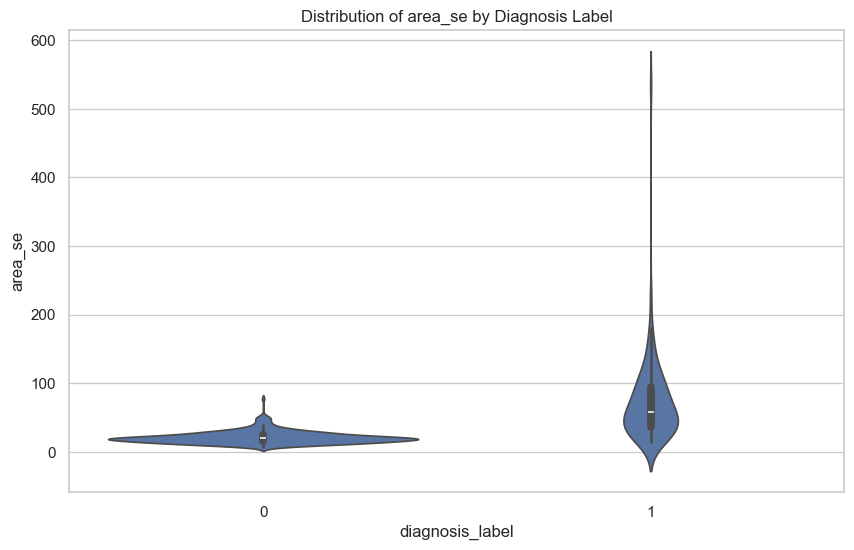

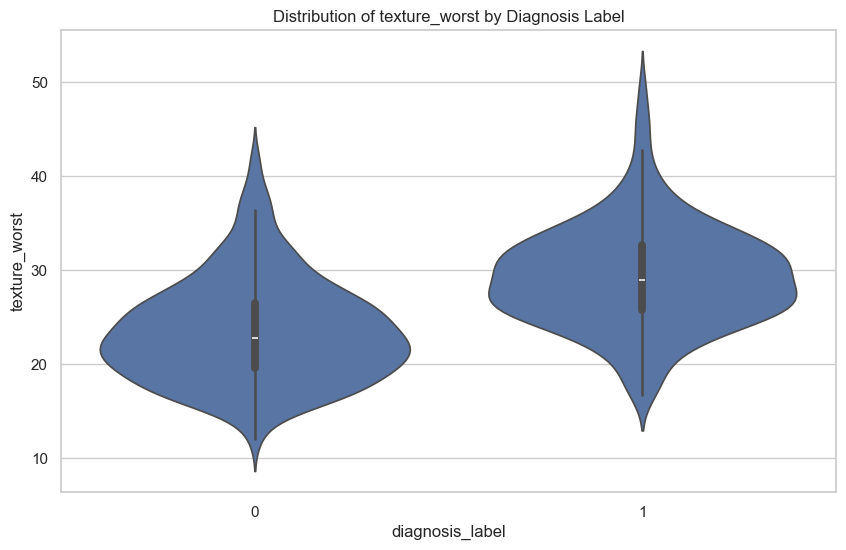

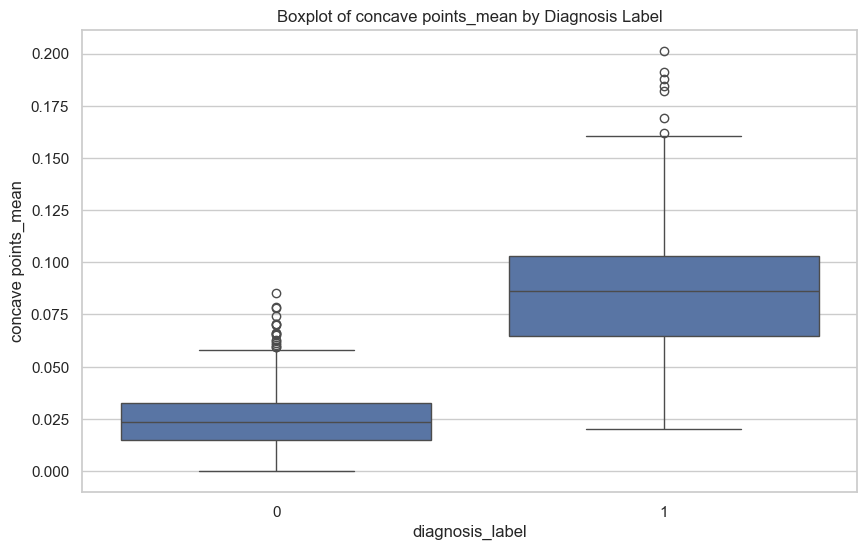

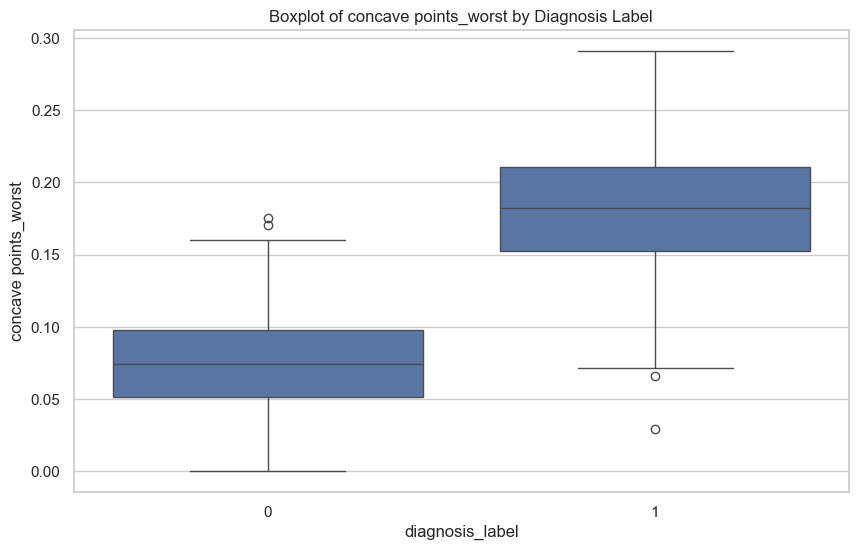

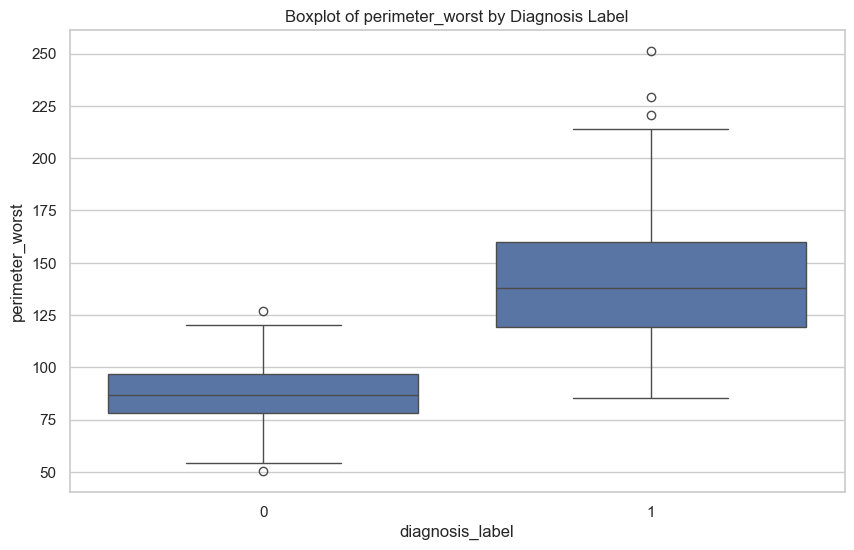

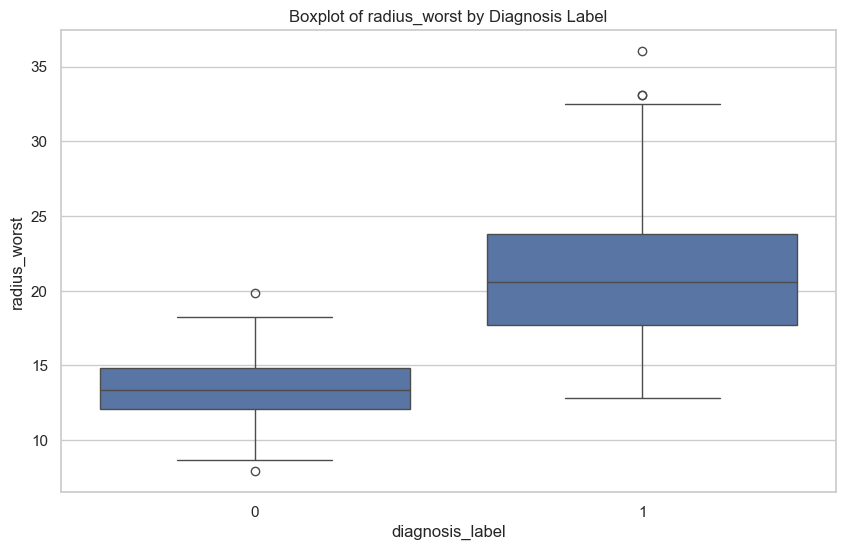

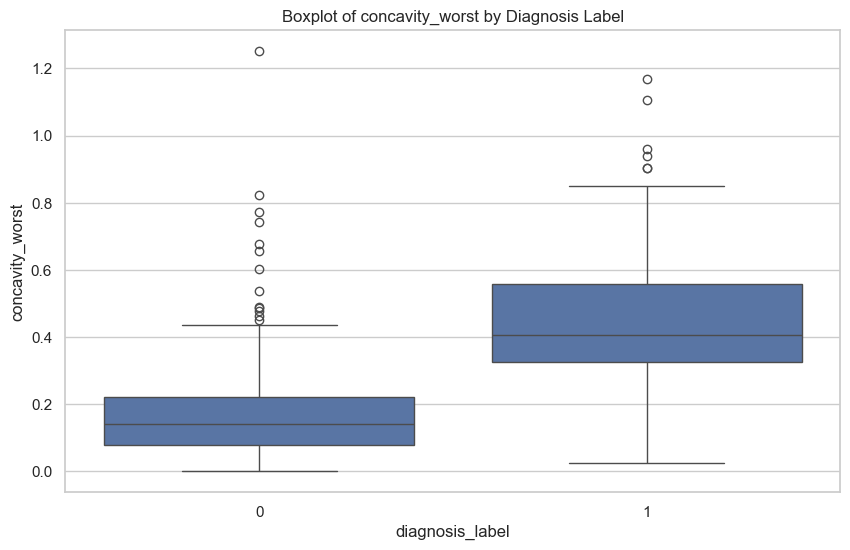

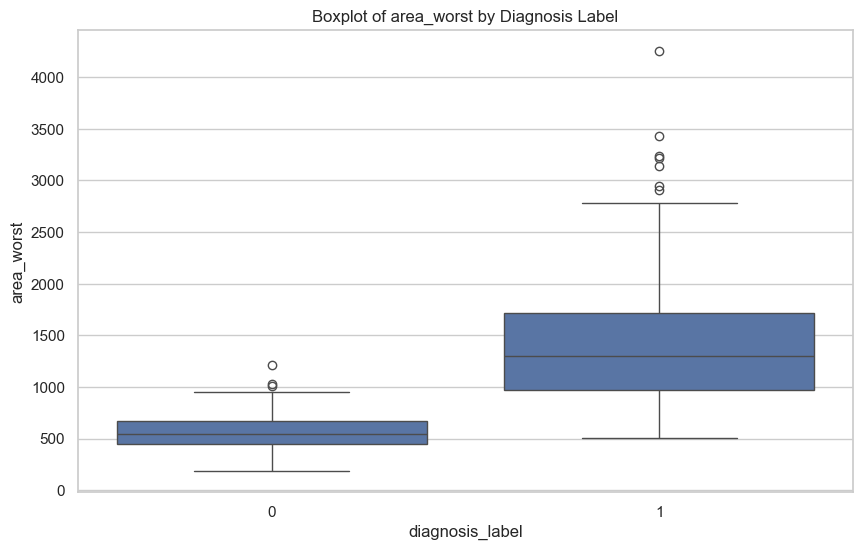

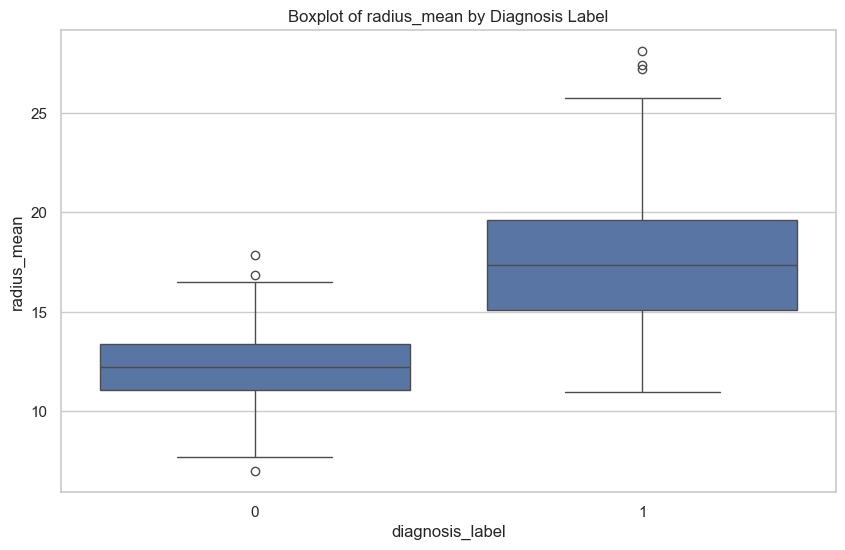

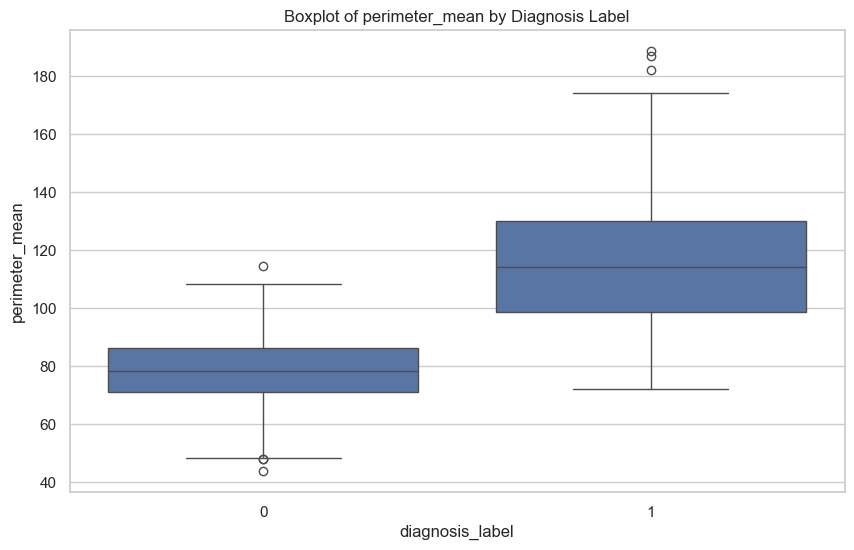

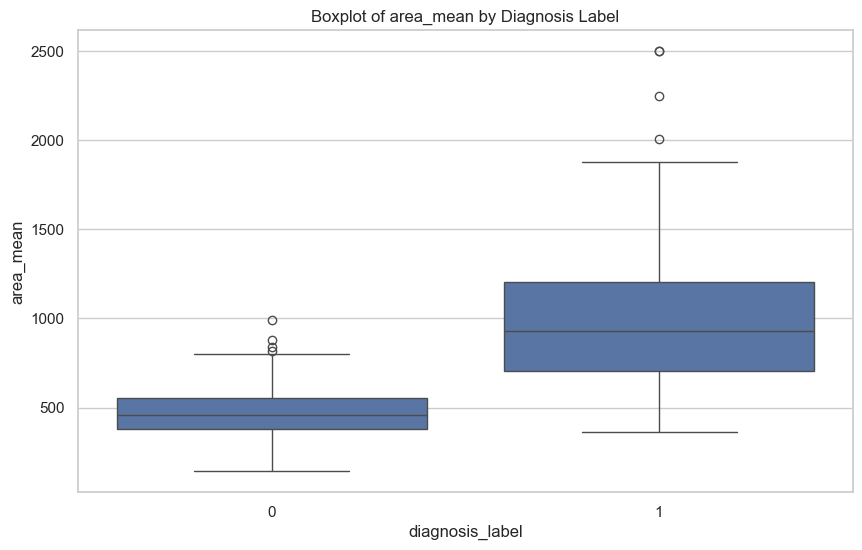

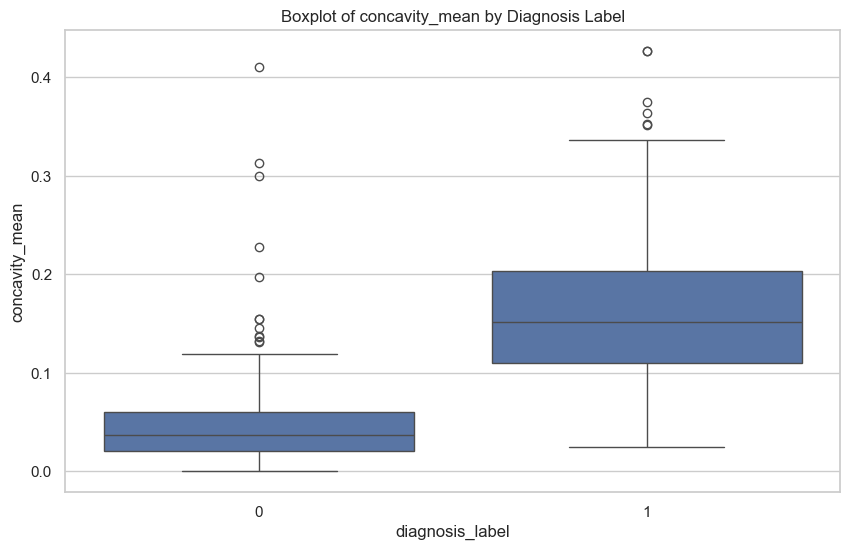

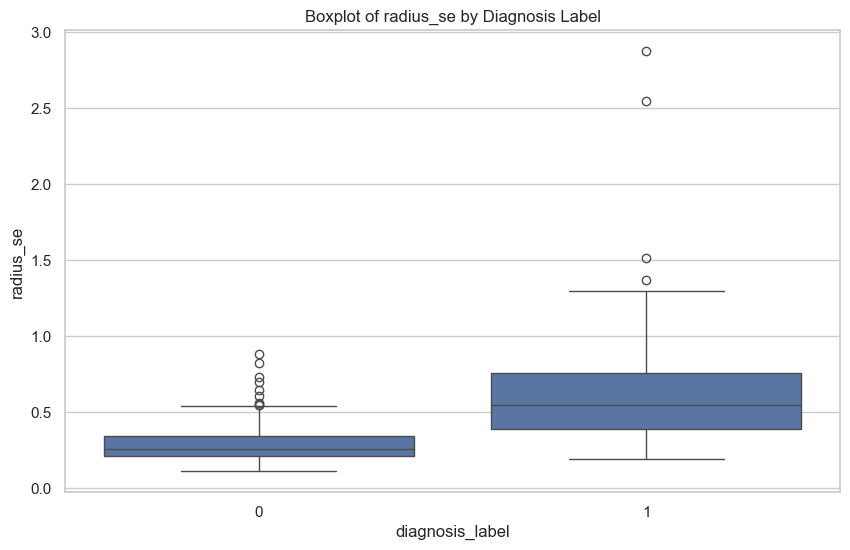

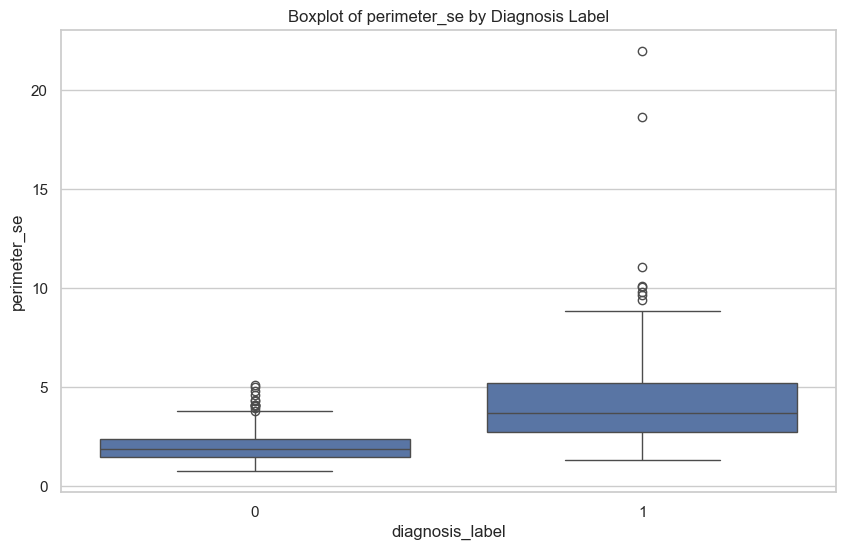

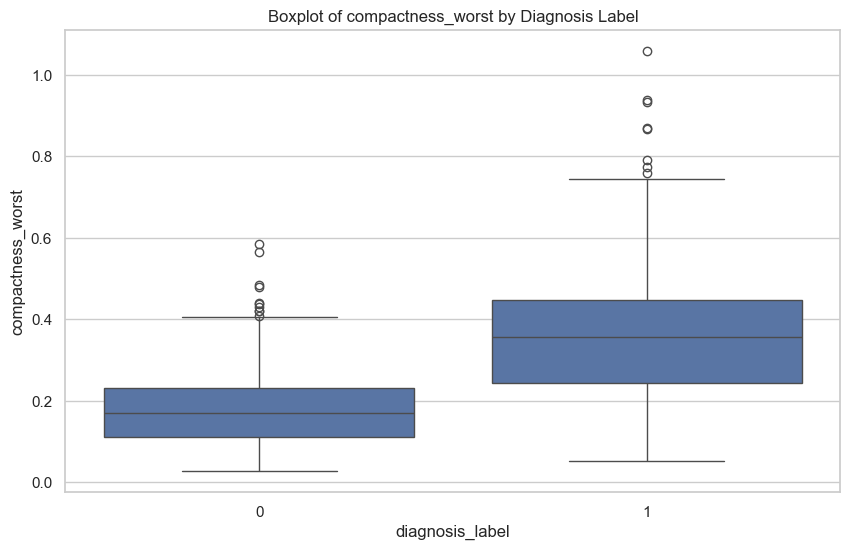

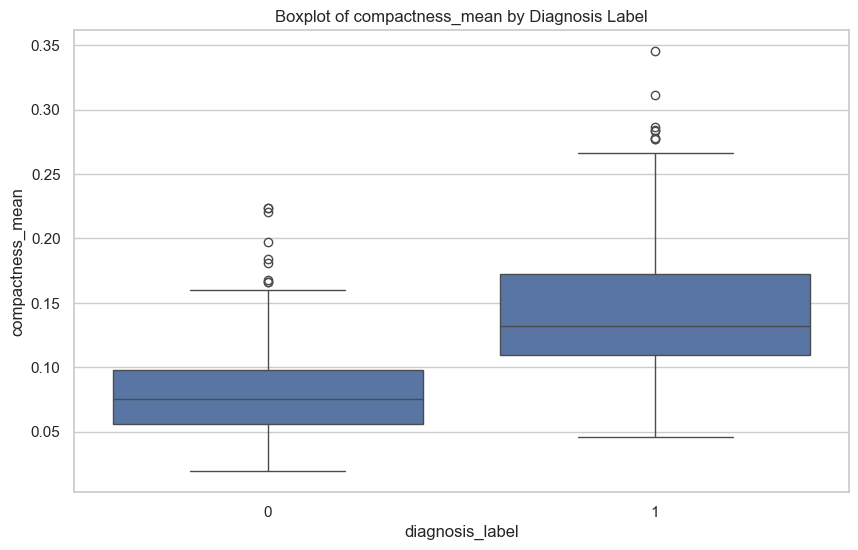

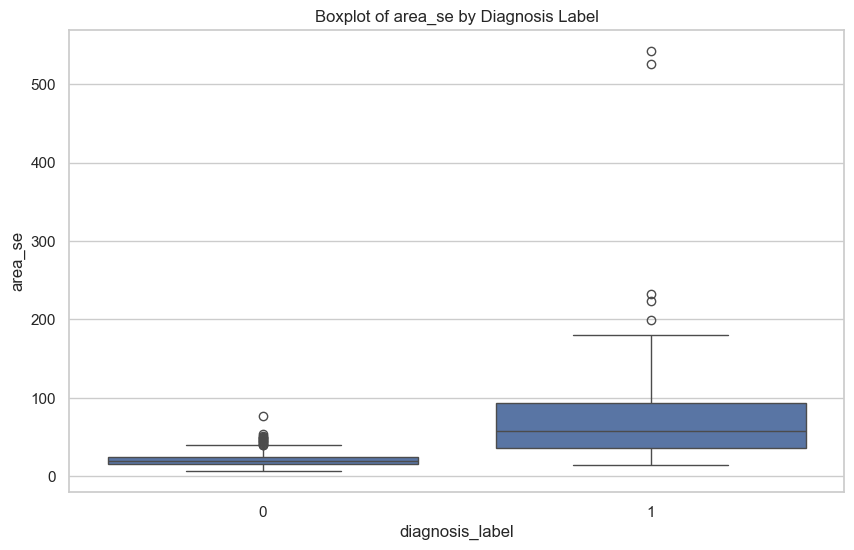

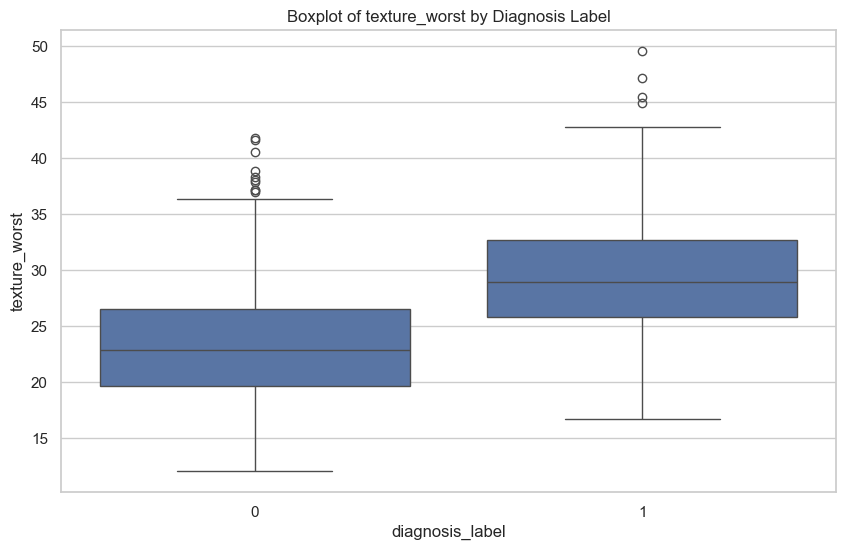

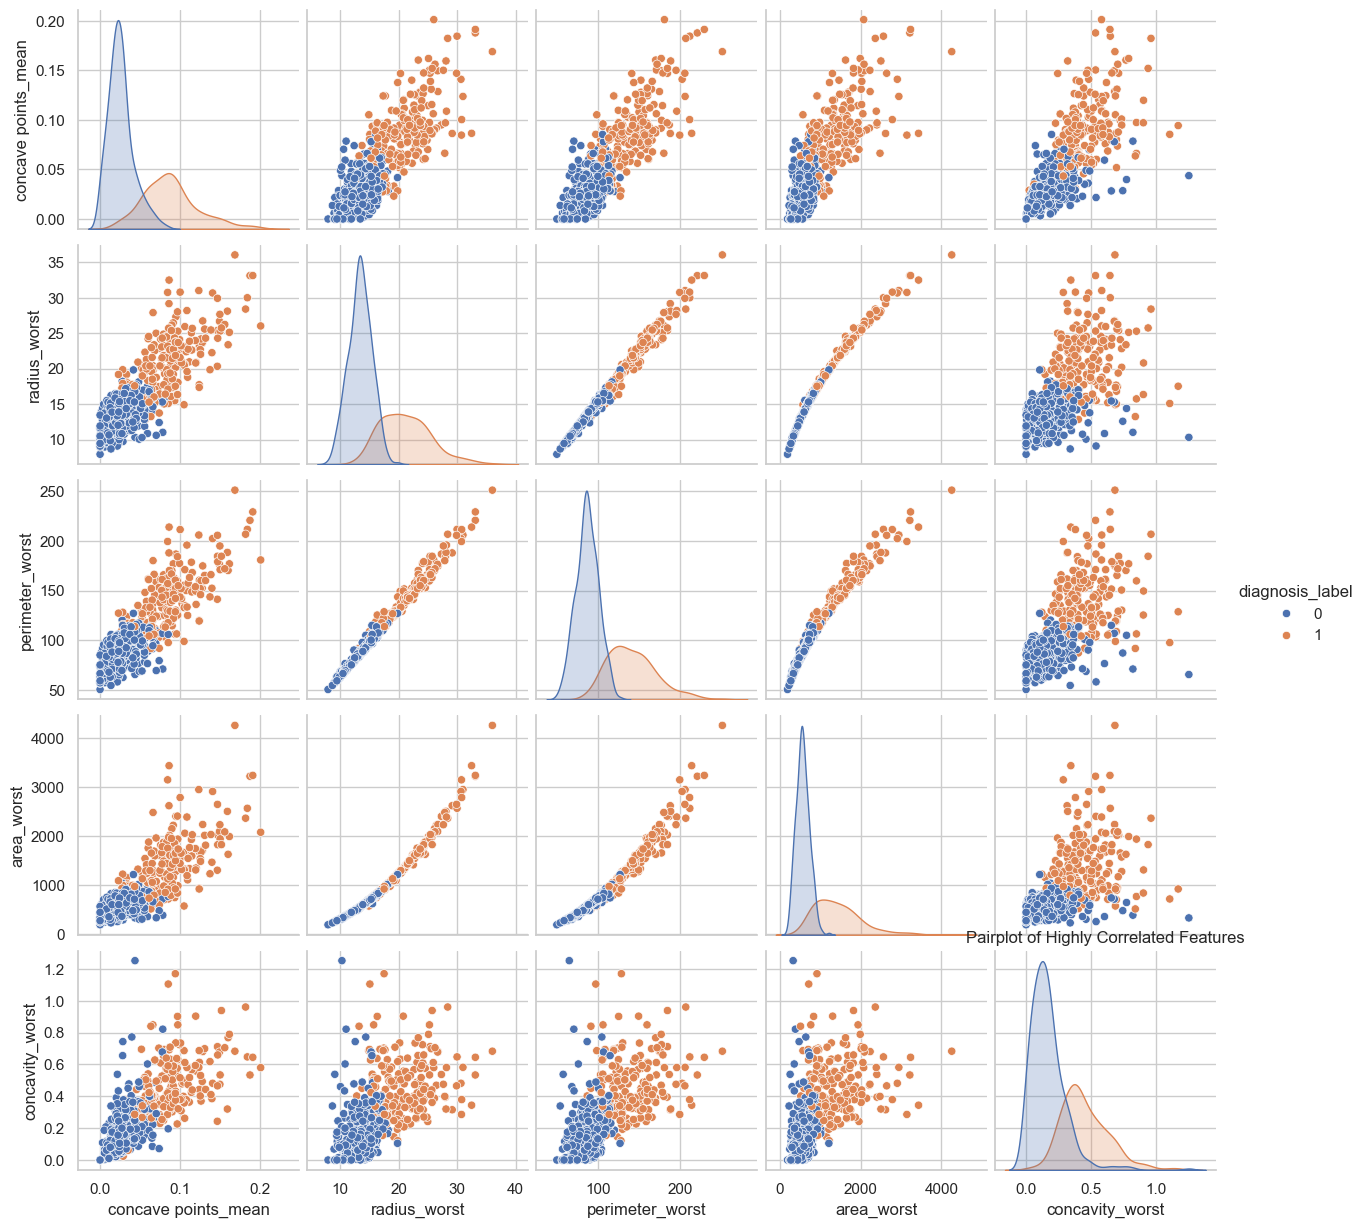

In [146]:
# plot of highly correlated features
# concave points_mean        0.8
# concave points_worst       0.8
# perimeter_worst            0.8
# radius_worst               0.8
# concavity_worst            0.7
# area_worst                 0.7
# radius_mean                0.7
# perimeter_mean             0.7
# area_mean                  0.7
# concavity_mean             0.7
# radius_se                  0.6
# perimeter_se               0.6
# compactness_worst          0.6
# compactness_mean           0.6
# area_se                    0.5
# texture_worst              0.5

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a pandas DataFrame and diagnosis_label is the target (0 for B, 1 for M)
plt.figure(figsize=(16, 12))
features = [
    "concave points_mean", "concave points_worst", "perimeter_worst", 
    "radius_worst", "concavity_worst", "area_worst", "radius_mean", 
    "perimeter_mean", "area_mean", "concavity_mean", "radius_se", 
    "perimeter_se", "compactness_worst", "compactness_mean", "area_se", 
    "texture_worst"
]

# Violin Plot to show feature distribution by target class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='diagnosis_label', y=feature, data=data_original)
    plt.title(f'Distribution of {feature} by Diagnosis Label')
    plt.show()

# Box Plot for a better view of outliers and spread
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diagnosis_label', y=feature, data=data_original)
    plt.title(f'Boxplot of {feature} by Diagnosis Label')
    plt.show()

# Pairplot of selected highly correlated features to check feature interactions
selected_features = [
    "concave points_mean", "radius_worst", "perimeter_worst", 
    "area_worst", "concavity_worst"
]

sns.pairplot(data=data_original, vars=selected_features, hue='diagnosis_label', diag_kind="kde")
plt.title('Pairplot of Highly Correlated Features')
plt.show()




# OUTLIERS

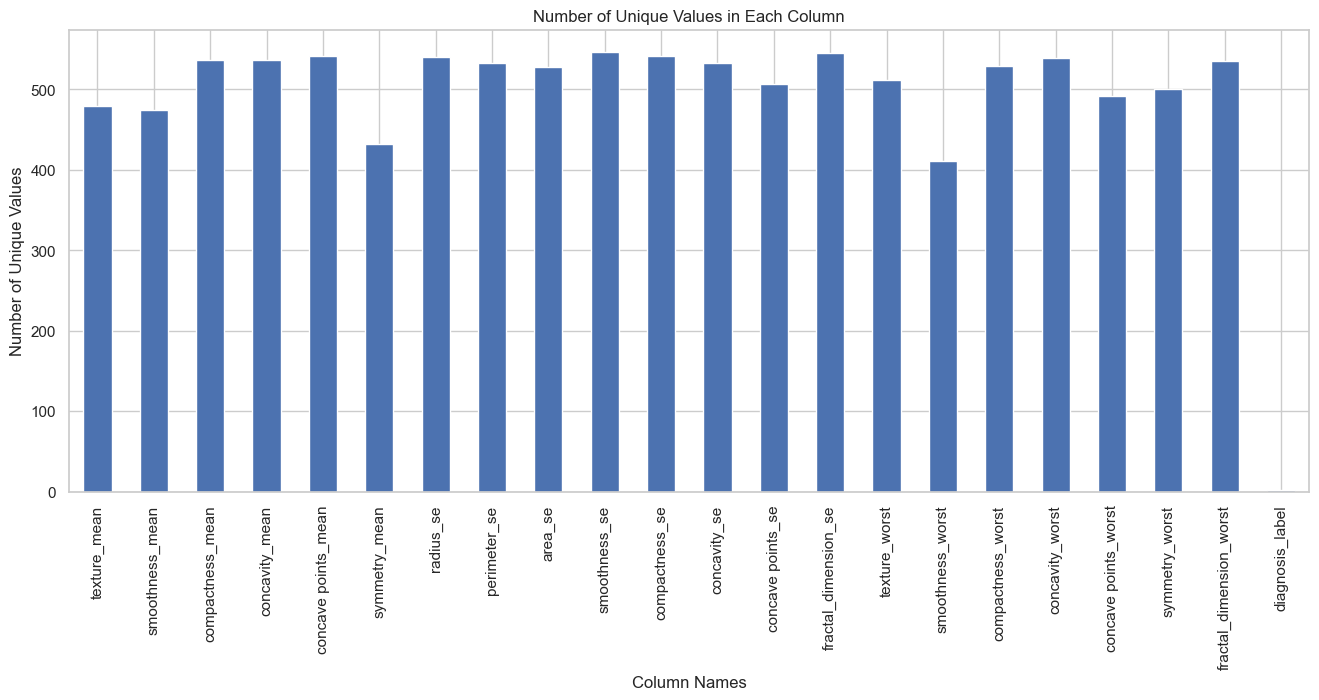

In [147]:
# Checking for outliers
# plot number of unique values in each column to check for outliers
plt.figure(figsize=(16, 6))
data.nunique().plot(kind='bar')
plt.title("Number of Unique Values in Each Column")
plt.xlabel("Column Names")
plt.ylabel("Number of Unique Values")
plt.show()


 # Normalizing the data 

In [148]:
# # Normalizing the data
# from sklearn.preprocessing import MinMaxScaler
# 
# scalar = MinMaxScaler()
# 
# data_scaled = data.copy()
# 
# data_scaled[data_scaled.columns[1:]] = scalar.fit_transform(data_scaled[data_scaled.columns[1:]])
# 
# data_scaled.describe()

data_scaled = data.copy()


# Categorial data

In [149]:
# check for categorical data
categorical_data = data.select_dtypes(include='object')
print(categorical_data.head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


# check for Null values 

In [150]:
# check for null values

print(data.isnull().sum())

texture_mean               0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
radius_se                  0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
fractal_dimension_se       0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_label            0
dtype: int64


# Split the data into training and test sets.

In [151]:
# Split the data into training and test sets.
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['diagnosis_label'])
y = data['diagnosis_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# show column names of X
print(X.columns)



(455, 21) (114, 21) (455,) (114,)
Index(['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Linear Separability Check

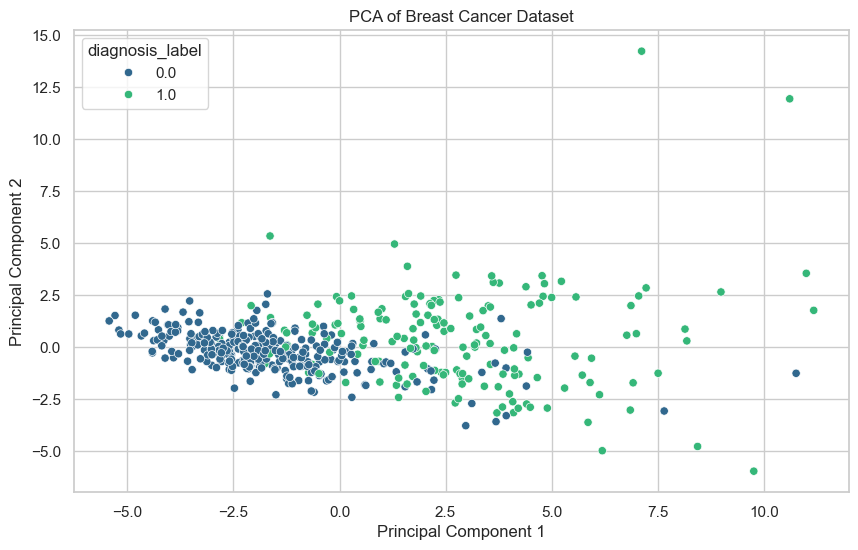

Linear SVM Accuracy: 0.9649122807017544


In [219]:
# Linear Separability Check
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot the data

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="viridis")
plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# using SVM 
from sklearn.svm import SVC

# Train linear SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Test and evaluate
accuracy = model.score(X_test, y_test)

print(f'Linear SVM Accuracy: {accuracy}')



# GaussianNaiveBayes 

In [168]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.prior = None
    
    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.classes = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes)
        
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        self.prior = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = np.mean(X_c, axis=0)
            self.var[idx, :] = np.var(X_c, axis=0)
            self.prior[idx] = X_c.shape[0] / X.shape[0]
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        return np.array([self._predict_single_sample(x) for x in X])
    
    def _predict_single_sample(self, x):
        posteriors = [
            np.log(self.prior[idx]) + np.sum(self._gaussian_log_prob(idx, x))
            for idx, _ in enumerate(self.classes)
        ]
        return self.classes[np.argmax(posteriors)]
    
    def _gaussian_log_prob(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        return (
            -((x - mean) ** 2) / (2 * var)
            - 0.5 * np.log(2 * np.pi * var)
        )

In [169]:
class GaussianDiscriminantAnalysis:
    def __init__(self, shared_covariance=True):
        self.shared_covariance = shared_covariance
        self.classes = None
        self.mean = None
        self.covariance = None
        self.prior = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.classes = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes)
        
        self.mean = np.zeros((n_classes, n_features))
        self.covariance = np.zeros((n_classes, n_features, n_features))
        self.prior = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = np.mean(X_c, axis=0)
            self.prior[idx] = X_c.shape[0] / X.shape[0]
            if not self.shared_covariance:
                # Class-specific covariance
                self.covariance[idx] = np.cov(X_c.T)
    
        if self.shared_covariance:
            # Shared covariance across all classes
            self.covariance_shared = np.cov(X.T)

    
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        posteriors = []
        for x in X:
            posteriors.append(self._predict_single_sample(x))
        return np.array(posteriors)
    
    def _predict_single_sample(self, x):
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior_log = np.log(self.prior[idx])
            if self.shared_covariance:
                conditional_log = self._gaussian_log_prob_shared(x, idx)
            else:
                conditional_log = self._gaussian_log_prob_class_specific(x, idx)
            posterior = prior_log + conditional_log
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _gaussian_log_prob_shared(self, x, class_idx):
        try:
            mean = self.mean[class_idx]
            cov_inv = np.linalg.inv(self.covariance_shared)
            diff = x - mean
            return -0.5 * (np.log(np.linalg.det(self.covariance_shared)) + diff.T @ cov_inv @ diff)
        except:
            print("Error")
            print("mean", mean)
            print("cov_inv", cov_inv)
            print("diff", diff)
            print("covariance_shared", self.covariance_shared)
            print("x", x)
            print("class_idx", class_idx)
            return 0
    

    def _gaussian_log_prob_class_specific(self, x, class_idx):
        mean = self.mean[class_idx]
        cov_inv = np.linalg.inv(self.covariance[class_idx])
        diff = x - mean
        return -0.5 * (np.log(np.linalg.det(self.covariance[class_idx])) + diff.T @ cov_inv @ diff)


In [170]:
print(X_train.dtypes)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

print(y_train.dtypes)
print(y_test.dtypes)

print("x shape:", y_train.shape, "x dtype:", y_train.dtype)


texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
radius_se                  float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
fractal_dimension_se       float64
texture_worst              float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object
float64
float64
x shape: (455,) x dtype: float64


In [187]:
# Initialize and train the models
gnb = GaussianNaiveBayes()
gda_shared = GaussianDiscriminantAnalysis(shared_covariance=True)
gda_class_specific = GaussianDiscriminantAnalysis(shared_covariance=False)

gnb.fit(np.array(X_train), np.array(y_train))
gda_shared.fit(np.array(X_train), np.array(y_train))
gda_class_specific.fit(np.array(X_train), np.array(y_train))

# Make predictions
y_pred_gnb = gnb.predict(X_test)
y_pred_gda_shared = gda_shared.predict(X_test)
y_pred_gda_class_specific = gda_class_specific.predict(X_test)

# Evaluate the models
from sklearn.metrics import accuracy_score

print("Accuracy of GNB: ", accuracy_score(y_test, y_pred_gnb))
print("Accuracy of GDA (shared covariance): ", accuracy_score(y_test, y_pred_gda_shared))
print("Accuracy of GDA (class-specific covariance): ", accuracy_score(y_test, y_pred_gda_class_specific))


Accuracy of GNB:  0.9122807017543859
Accuracy of GDA (shared covariance):  0.9122807017543859
Accuracy of GDA (class-specific covariance):  0.9473684210526315


# Model Evaluation for Gaussian Naive Bayes

Gaussian Naive Bayes
[[67  4]
 [ 6 37]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        71
         1.0       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

AUC: 0.9020635440550279


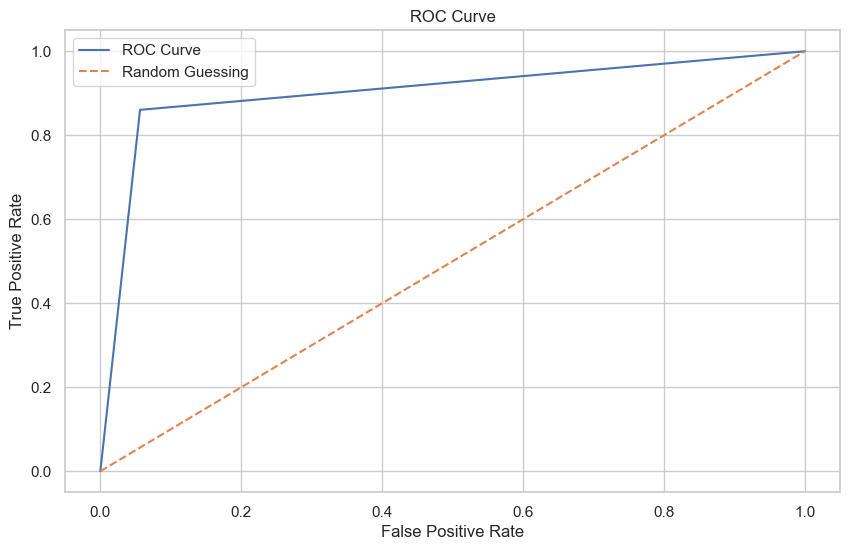

In [203]:
# Model Evaluation for Gaussian Naive Bayes, Gaussian Discriminant Analysis (Shared Covariance), and Gaussian Discriminant Analysis (Class-Specific Covariance)

from sklearn.metrics import classification_report, confusion_matrix

print("Gaussian Naive Bayes")
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities for the positive class (class 1)
y_prob = gnb.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Display the plot
plt.show()




 # Model eval Gaussian Discriminant Analysis (Shared Covariance)

Gaussian Discriminant Analysis (Shared Covariance)
[[69  2]
 [ 8 35]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        71
         1.0       0.95      0.81      0.88        43

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

AUC: 0.8928922371437931


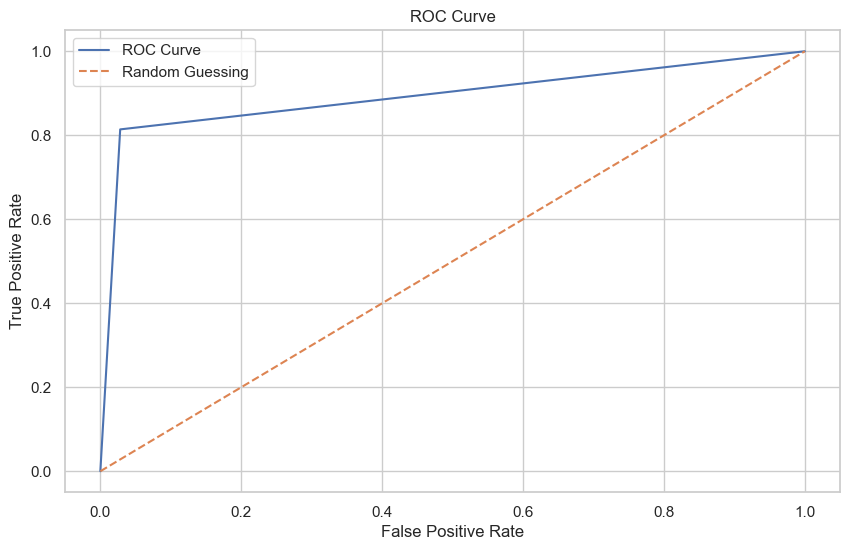

In [204]:

print("Gaussian Discriminant Analysis (Shared Covariance)")
print(confusion_matrix(y_test, y_pred_gda_shared))
print(classification_report(y_test, y_pred_gda_shared))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class (class 1)
y_prob = gda_shared.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

# Display the plot
plt.show()




# Model eval Gaussian Discriminant Analysis (Class-Specific Covariance)

Gaussian Discriminant Analysis (Class-Specific Covariance)
[[67  4]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        71
         1.0       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC: 0.9485751719620045


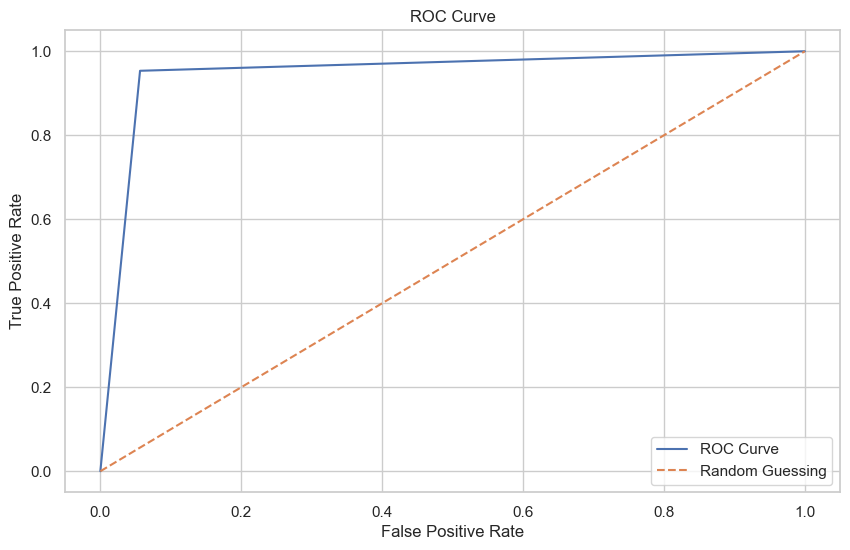

In [205]:
print("Gaussian Discriminant Analysis (Class-Specific Covariance)")
print(confusion_matrix(y_test, y_pred_gda_class_specific))
print(classification_report(y_test, y_pred_gda_class_specific))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class (class 1)
y_prob = gda_class_specific.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

# Display the plot
plt.show()

# Logestic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It uses the logistic (sigmoid) function to map any real-valued number into a value between 0 and 1.

The logistic function is defined as:
    h_θ(x) = 1 / (1 + e^(-θ^T x))
     
where:
- h_θ(x) is the predicted probability that x belongs to the positive class.
- θ is the weight vector.
- x is the input feature vector.
 
Cost Function
The cost function for Logistic Regression is the negative log-likelihood, which simplifies to the cross-entropy loss:
J(θ) = -(1/m) ∑[i=1 to m] [y^(i) log(h_θ(x^(i))) + (1 - y^(i)) log(1 - h_θ(x^(i)))]

Gradient Descent
The gradient of the cost function is:
∇J(θ) = (1/m) X^T (h - y)

where:
- X is the input feature matrix.
- h is the predicted probability.
- y is the true label.
- m is the number of samples.
- T is the transpose operator.



In [191]:
import numpy as np

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000, fit_intercept=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.fit_intercept = fit_intercept
        self.theta = None

    def _add_intercept(self, X):
        # Add intercept term to X
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def _sigmoid(self, z):
        # Sigmoid function
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Check if X is a NumPy array
        if isinstance(X, np.ndarray) == False:
            X = np.array(X)
        if self.fit_intercept:
            X = self._add_intercept(X)

        # Initialize weights
        self.theta = np.zeros(X.shape[1])

        # Gradient descent
        for i in range(self.n_iterations):
            z = np.dot(X, self.theta)
            h = self._sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict_proba(self, X):
        # Predict probability estimates
        if isinstance(X, np.ndarray) == False:
            X = np.array(X)
        if self.fit_intercept:
            X = self._add_intercept(X)
        return self._sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        # Predict binary labels
        return self.predict_proba(X) >= threshold


In [192]:
# Initialize and train the model
log_reg = LogisticRegressionGD(learning_rate=0.1, n_iterations=1000)
log_reg.fit(X_train, y_train)


# Model Evaluation for Logistic Regression

Accuracy of Logistic Regression:  0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC: 0.9901735997379626


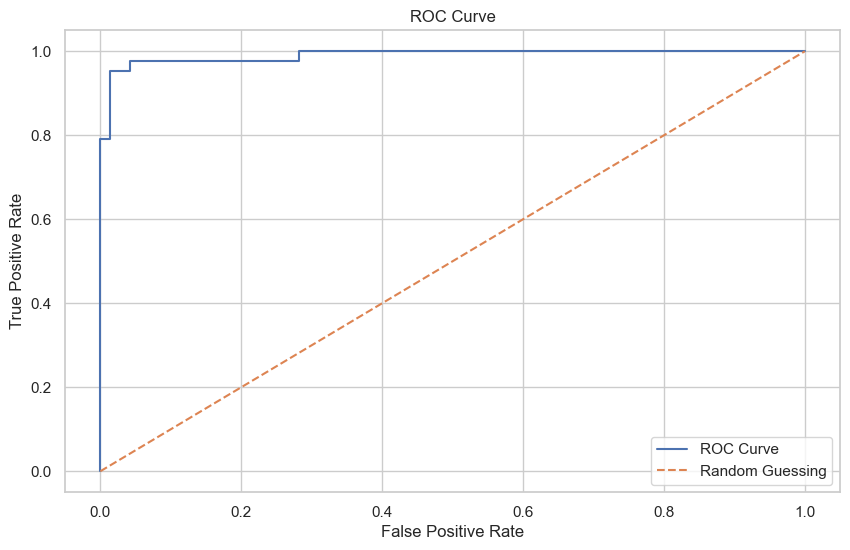

In [202]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities for the positive class (class 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Display the plot
plt.show()


# Perceptron Algorithm

## Derive the Perceptron Learning Rule

### Perceptron Model

The Perceptron computes a weighted sum of the input features and applies a step function to determine the output:

**Output:**
\[
y = 
\begin{cases} 
1 & \text{if } w^T x + b > 0 \\
0 & \text{otherwise}
\end{cases}
\]
where:

- \( w \) is the weight vector.
- \( x \) is the input feature vector.
- \( b \) is the bias term.

### Perceptron Learning Rule

The Perceptron learning rule updates the weights whenever the model misclassifies a training sample. The update rule is:

w := w + Δw
Δw = η(y^(i) - ŷ^(i))x^(i)

Similarly for the bias term:

b := b + η(y^(i) - ŷ^(i))

where:

- \( \eta \) is the learning rate.
- \( y^{(i)} \) is the true label.
- \( \hat{y}^{(i)} \) is the predicted label.
- \( x^{(i)} \) is the input vector for the \( i \)-th sample.

### Activation Function

The activation function is a step function (also known as the Heaviside step function):

ŷ = {
    1  if w^T x + b ≥ 0
    0  otherwise
}


In [194]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to {0, 1}
        y_ = np.array(y)

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._unit_step_function(linear_output)

                # Update weights and bias if misclassified
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._unit_step_function(linear_output)
        return y_predicted


# Traininig the Perceptron model

In [217]:
# Create an instance of the Perceptron class
perceptron = Perceptron(max_iter=1000)

# Fit the model to the training data
perceptron.fit(X_train, y_train)


if perceptron.n_iter_ < perceptron.max_iter:
    print("The Perceptron converged, so the data is likely linearly separable.")
else:
    print("The Perceptron did not converge, so the data may not be linearly separable.")


The Perceptron converged, so the data is likely linearly separable.


# Model Evaluation for Perceptron

Accuracy of Perceptron:  0.9649122807017544
[[68  3]
 [ 1 42]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        71
         1.0       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

AUC: 0.9672453324598755


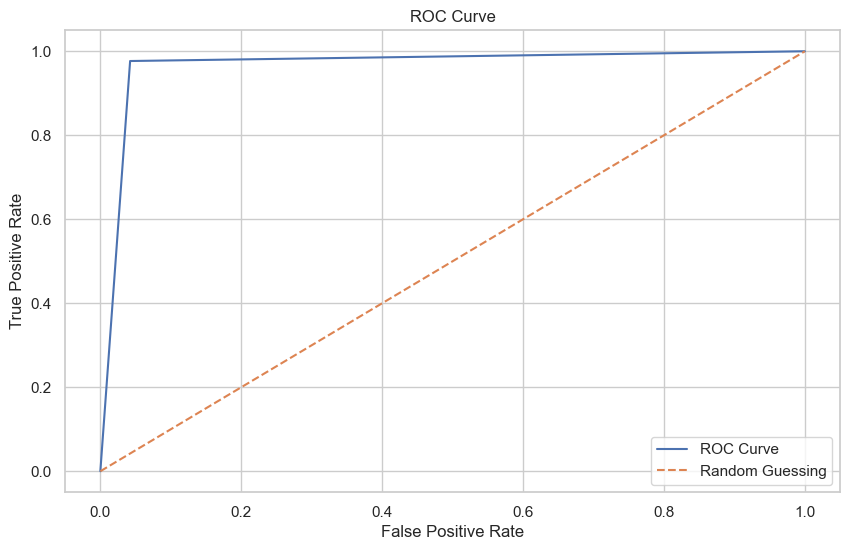

In [206]:
# Make predictions
y_pred_perceptron = perceptron.predict(X_test)

# Evaluate the model
print("Accuracy of Perceptron: ", accuracy_score(y_test, y_pred_perceptron))
print(confusion_matrix(y_test, y_pred_perceptron))
print(classification_report(y_test, y_pred_perceptron))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class (class 1)
y_prob = perceptron.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Display the plot
plt.show()



# Standard API algorithms

Accuracy of Gaussian Naive Bayes ( Standard API):  0.9122807017543859
[[67  4]
 [ 6 37]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        71
         1.0       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

AUC: 0.9816573861775303


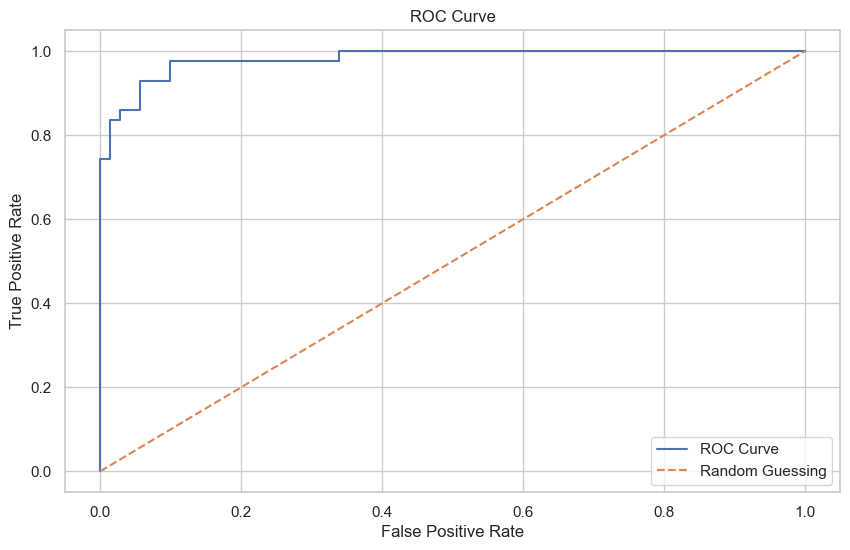

In [207]:
# Standard API algorithms
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
print("Accuracy of Gaussian Naive Bayes ( Standard API): ", accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class (class 1)
y_prob = gnb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Display the plot
plt.show()


Accuracy of LDA (Shared Covariance) (Standard API):  0.9473684210526315
[[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        71
         1.0       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC: 0.9875532263347526


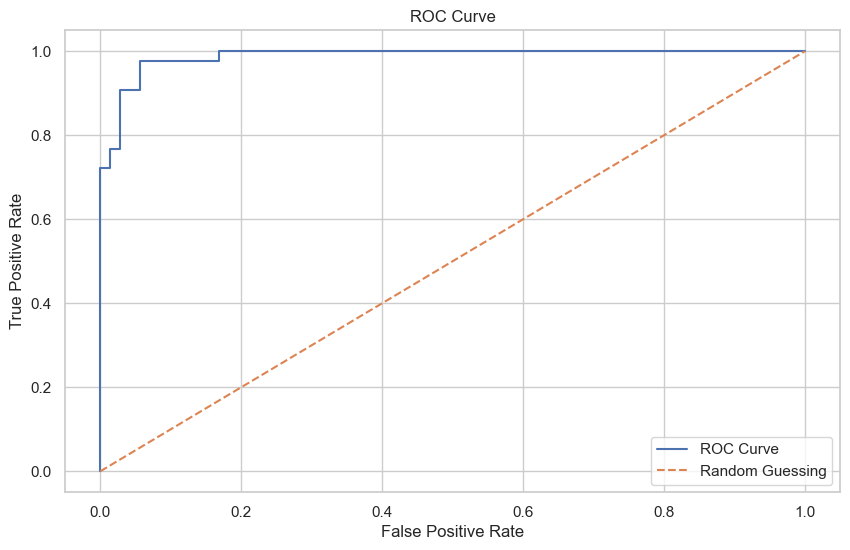

In [212]:
# Gaussian Discriminant Analysis (Shared Covariance)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and train the model
lda_shared = LinearDiscriminantAnalysis()
lda_shared.fit(X_train, y_train)

# Make predictions
y_pred_lda_shared = lda_shared.predict(X_test)

# Evaluate the model
print("Accuracy of LDA (Shared Covariance) (Standard API): ", accuracy_score(y_test, y_pred_lda_shared))
print(confusion_matrix(y_test, y_pred_lda_shared))
print(classification_report(y_test, y_pred_lda_shared))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class (class 1)
y_prob = lda_shared.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))

plt.plot(fpr, tpr, label="ROC Curve")

plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)




Accuracy of QDA (Class-Specific Covariance) (Standard API):  0.9473684210526315
[[67  4]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        71
         1.0       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC: 0.987880773010154


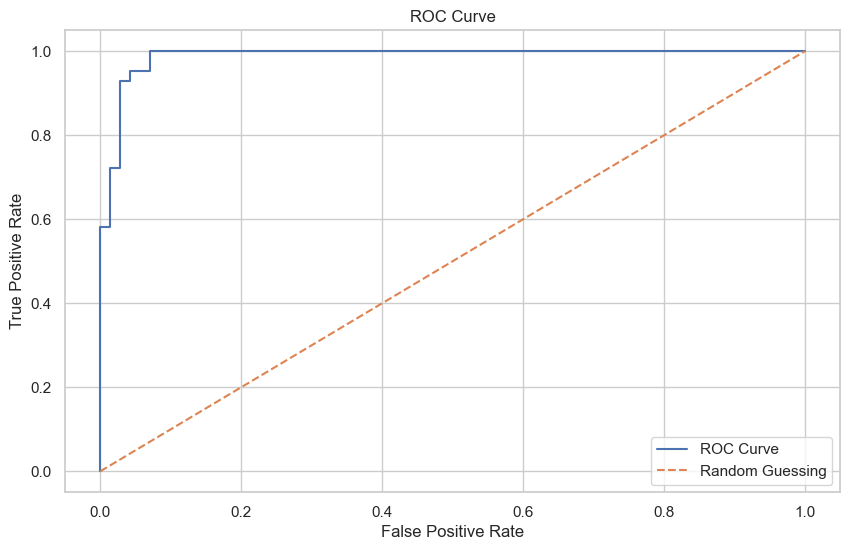

In [209]:
# Gaussian Discriminant Analysis (Class-Specific Covariance)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize and train the model
qda_class_specific = QuadraticDiscriminantAnalysis()
qda_class_specific.fit(X_train, y_train)
    
# Make predictions
y_pred_qda_class_specific = qda_class_specific.predict(X_test)

# Evaluate the model
print("Accuracy of QDA (Class-Specific Covariance) (Standard API): ", accuracy_score(y_test, y_pred_qda_class_specific))
print(confusion_matrix(y_test, y_pred_qda_class_specific))
print(classification_report(y_test, y_pred_qda_class_specific))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score
    
# Get the probabilities for the positive class (class 1)
y_prob = qda_class_specific.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Display the plot
plt.show()



Accuracy of Logistic Regression (Standard API):  0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC: 0.9901735997379626


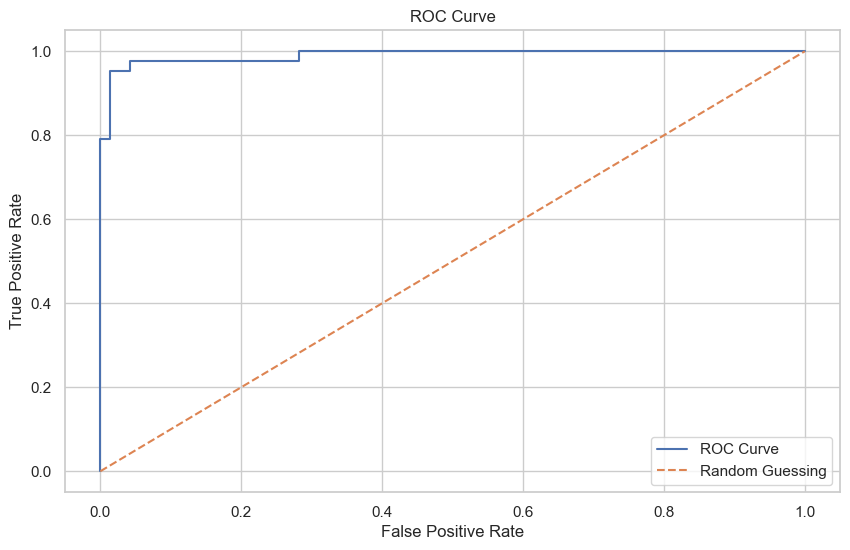

In [210]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy of Logistic Regression (Standard API): ", accuracy_score(y_test, y_pred_log_reg))

print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class (class 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Display the plot
plt.show()



Accuracy of Perceptron (Standard API):  0.9210526315789473
[[64  7]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        71
         1.0       0.85      0.95      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

AUC: 0.9665902391090732


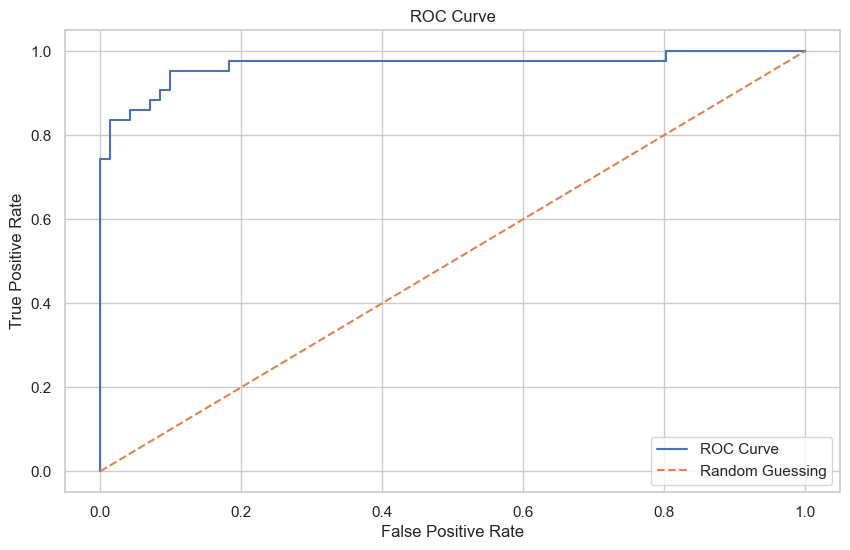

In [213]:
# Perceptron
from sklearn.linear_model import Perceptron

# Initialize and train the model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Make predictions
y_pred_perceptron = perceptron.predict(X_test)

# Evaluate the model
print("Accuracy of Perceptron (Standard API): ", accuracy_score(y_test, y_pred_perceptron))
print(confusion_matrix(y_test, y_pred_perceptron))
print(classification_report(y_test, y_pred_perceptron))

# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class (class 1)
y_prob = perceptron.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))

plt.plot(fpr, tpr, label="ROC Curve")

plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Display the plot
plt.show()


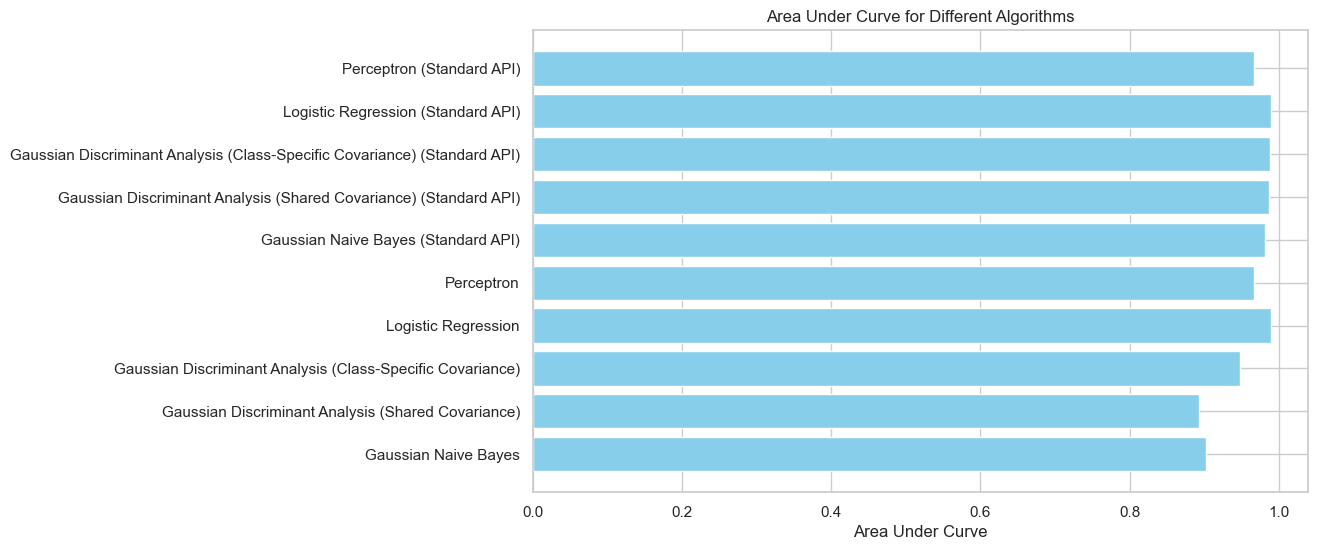

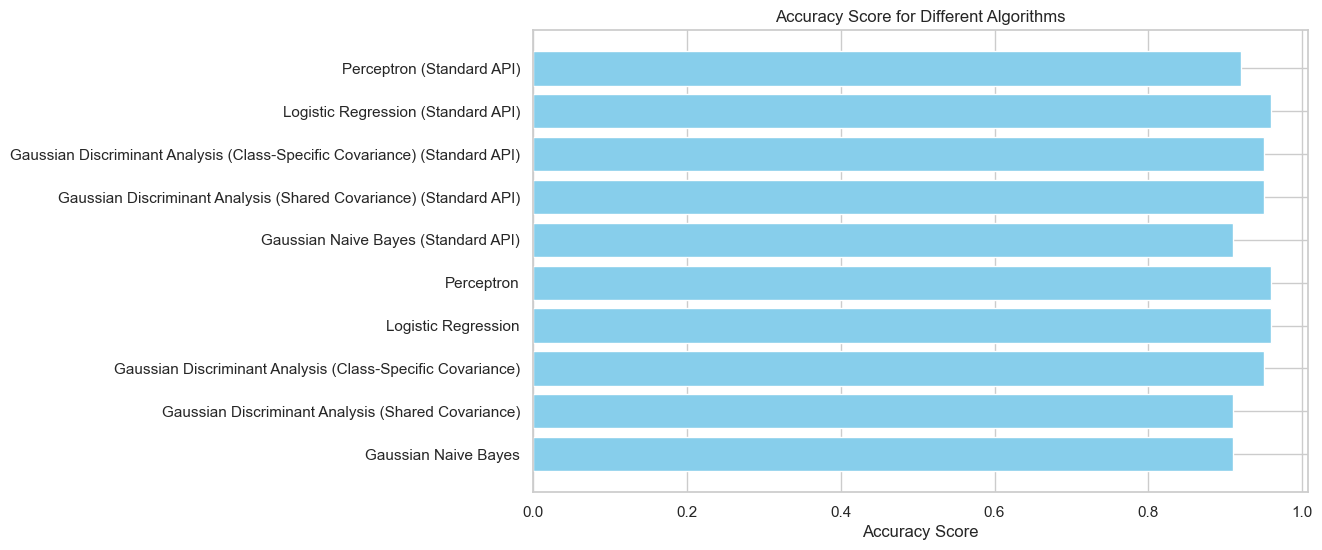

In [215]:
# plotting area under curver for all algorithms
algorithms = [
    "Gaussian Naive Bayes",
    "Gaussian Discriminant Analysis (Shared Covariance)",
    "Gaussian Discriminant Analysis (Class-Specific Covariance)",
    "Logistic Regression",
    "Perceptron",
    "Gaussian Naive Bayes (Standard API)",
    "Gaussian Discriminant Analysis (Shared Covariance) (Standard API)",
    "Gaussian Discriminant Analysis (Class-Specific Covariance) (Standard API)",
    "Logistic Regression (Standard API)",
    "Perceptron (Standard API)"
]


# Gaussian Naive Bayes
# [[67  4]
#  [ 6 37]]
#               precision    recall  f1-score   support
# 
#          0.0       0.92      0.94      0.93        71
#          1.0       0.90      0.86      0.88        43
# 
#     accuracy                           0.91       114
#    macro avg       0.91      0.90      0.91       114
# weighted avg       0.91      0.91      0.91       114
# 
# AUC: 0.9020635440550279

# Gaussian Discriminant Analysis (Shared Covariance)
# [[69  2]
#  [ 8 35]]
#               precision    recall  f1-score   support
# 
#          0.0       0.90      0.97      0.93        71
#          1.0       0.95      0.81      0.88        43
# 
#     accuracy                           0.91       114
#    macro avg       0.92      0.89      0.90       114
# weighted avg       0.91      0.91      0.91       114
# 
# AUC: 0.8928922371437931

# Gaussian Discriminant Analysis (Class-Specific Covariance)
# [[67  4]
#  [ 2 41]]
#               precision    recall  f1-score   support
# 
#          0.0       0.97      0.94      0.96        71
#          1.0       0.91      0.95      0.93        43
# 
#     accuracy                           0.95       114
#    macro avg       0.94      0.95      0.94       114
# weighted avg       0.95      0.95      0.95       114
# 
# AUC: 0.9485751719620045

# Accuracy of Logistic Regression:  0.9649122807017544
# [[70  1]
#  [ 3 40]]
#               precision    recall  f1-score   support
# 
#          0.0       0.96      0.99      0.97        71
#          1.0       0.98      0.93      0.95        43
# 
#     accuracy                           0.96       114
#    macro avg       0.97      0.96      0.96       114
# weighted avg       0.97      0.96      0.96       114
# 
# AUC: 0.9901735997379626

# Perceptron
# Accuracy of Perceptron:  0.9649122807017544
# [[68  3]
#  [ 1 42]]
#               precision    recall  f1-score   support
# 
#          0.0       0.99      0.96      0.97        71
#          1.0       0.93      0.98      0.95        43
# 
#     accuracy                           0.96       114
#    macro avg       0.96      0.97      0.96       114
# weighted avg       0.97      0.96      0.97       114
# 
# AUC: 0.9672453324598755


# Gaussian Naive Bayes (Standard API)
# Accuracy of Gaussian Naive Bayes ( Standard API):  0.9122807017543859
# [[67  4]
#  [ 6 37]]
#               precision    recall  f1-score   support
# 
#          0.0       0.92      0.94      0.93        71
#          1.0       0.90      0.86      0.88        43
# 
#     accuracy                           0.91       114
#    macro avg       0.91      0.90      0.91       114
# weighted avg       0.91      0.91      0.91       114
# 
# AUC: 0.9816573861775303

# Gaussian Discriminant Analysis (Shared Covariance) (Standard API)
# Accuracy of LDA (Shared Covariance) (Standard API):  0.9473684210526315
# [[69  2]
#  [ 4 39]]
#               precision    recall  f1-score   support
# 
#          0.0       0.95      0.97      0.96        71
#          1.0       0.95      0.91      0.93        43
# 
#     accuracy                           0.95       114
#    macro avg       0.95      0.94      0.94       114
# weighted avg       0.95      0.95      0.95       114
# 
# AUC: 0.9875532263347526


# Gaussian Discriminant Analysis (Class-Specific Covariance) (Standard API)
# Accuracy of QDA (Class-Specific Covariance) (Standard API):  0.9473684210526315
# [[67  4]
#  [ 2 41]]
#               precision    recall  f1-score   support
# 
#          0.0       0.97      0.94      0.96        71
#          1.0       0.91      0.95      0.93        43
# 
#     accuracy                           0.95       114
#    macro avg       0.94      0.95      0.94       114
# weighted avg       0.95      0.95      0.95       114
# 
# AUC: 0.987880773010154

# Logistic Regression (Standard API)
# Accuracy of Logistic Regression (Standard API):  0.9649122807017544
# [[70  1]
#  [ 3 40]]
#               precision    recall  f1-score   support
# 
#          0.0       0.96      0.99      0.97        71
#          1.0       0.98      0.93      0.95        43
# 
#     accuracy                           0.96       114
#    macro avg       0.97      0.96      0.96       114
# weighted avg       0.97      0.96      0.96       114
# 
# AUC: 0.9901735997379626

# Perceptron (Standard API)
# Accuracy of Perceptron (Standard API):  0.9210526315789473
# [[64  7]
#  [ 2 41]]
#               precision    recall  f1-score   support
# 
#          0.0       0.97      0.90      0.93        71
#          1.0       0.85      0.95      0.90        43
# 
#     accuracy                           0.92       114
#    macro avg       0.91      0.93      0.92       114
# weighted avg       0.93      0.92      0.92       114
# 
# AUC: 0.9665902391090732
area_under_curve = [
    0.9020635440550279, 0.8928922371437931, 0.9485751719620045, 0.9901735997379626, 0.9672453324598755,
    0.9816573861775303, 0.9875532263347526, 0.987880773010154, 0.9901735997379626, 0.9665902391090732
]

accuracy_score = [
    0.91, 0.91, 0.95, 0.96, 0.96, 0.91, 0.95, 0.95, 0.96, 0.92
]

# Plot the AUC for each algorithm
plt.figure(figsize=(10, 6))
plt.barh(algorithms, area_under_curve, color="skyblue")
plt.xlabel("Area Under Curve")
plt.title("Area Under Curve for Different Algorithms")
plt.show()


# Plot the accuracy score for each algorithm
plt.figure(figsize=(10, 6))
plt.barh(algorithms, accuracy_score, color="skyblue")
plt.xlabel("Accuracy Score")
plt.title("Accuracy Score for Different Algorithms")
plt.show()



- Gaussian Naive Bayes (GNB):

Strengths: Simple, fast, and performs well with small datasets. High precision and recall, particularly for class 0.
Weaknesses: Assumes feature independence, which may limit performance. Lower recall for class 1 compared to other models.
 
- Gaussian Discriminant Analysis (GDA) - Shared Covariance (LDA):

Strengths: Balances well between classes, performing with high precision and recall, particularly for class 0. Handles shared covariance effectively, showing strong results overall.
Weaknesses: Class 1 recall is lower than expected, meaning it can miss some positive cases.
 
- Gaussian Discriminant Analysis (GDA) - Class-Specific Covariance (QDA):

Strengths: Very strong performance, particularly for class 1. More flexible covariance matrix allows better class separation. High AUC and f1-score make it one of the best models in this comparison.
Weaknesses: Slightly more complex model, could be prone to overfitting on small datasets.
 
- Logistic Regression:

Strengths: High accuracy, strong AUC, and reliable across both classes. Simpler and more interpretable compared to other models.
Weaknesses: It may struggle with non-linear separations, as it assumes a linear decision boundary.

- Perceptron:

Strengths: Good accuracy and recall for class 1, performs well even with limited computational power. Similar results to logistic regression.
Weaknesses: Sensitive to noisy data, and its linear decision boundary can limit performance in more complex problems.